In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [22]:
df  = pd.read_csv(r'C:\Users\JAINY\Documents\GitHub\machine_learning\Projects\Mnist_digit_recognizer\Data\train\train.csv')
df_test = pd.read_csv(r'C:\Users\JAINY\Documents\GitHub\machine_learning\Projects\Mnist_digit_recognizer\Data\test\test.csv')

In [23]:
df_to_np = df.values
x_test = df_test.values
x_train = df_to_np[:,1:]
y_train = df_to_np[:,0]
print(x_test.shape)

(28000, 784)


In [24]:
print(x_train.shape)
print(y_train.shape)

(42000, 784)
(42000,)


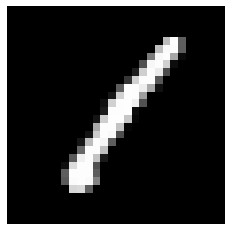

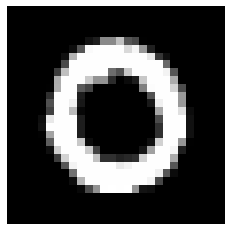

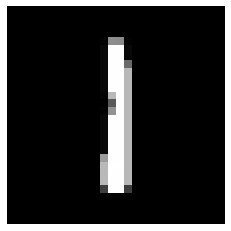

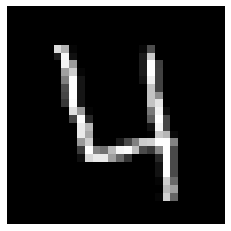

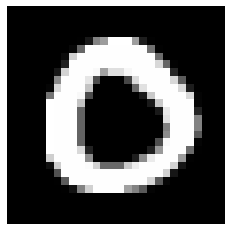

In [25]:
for i in range(5):
    plt.imshow(x_train[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.show()

In [26]:
y_train = y_train.reshape(-1,1)
print(y_train.shape)

(42000, 1)


In [27]:
from keras.layers import *

from keras.models import Sequential
import keras
import keras.layers as layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import TensorBoard


model = Sequential()

In [28]:
# image reshaping
def preprocess_data(X,Y):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
    Y = to_categorical(Y)
    return X,Y

def preprocess_testdata(X):
    X = X.reshape((-1,28,28,1))
    X = X/255.0
   # Y = to_categorical(Y)
    return X



XTrain,YTrain = preprocess_data(x_train,y_train)
# padding on train data
XTrain      = np.pad(XTrain, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print(XTrain.shape,YTrain.shape)

XTest = preprocess_testdata(x_test)
# padding in test data
XTest = np.pad(XTest, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print(XTest.shape)



(42000, 32, 32, 1) (42000, 10)
(28000, 32, 32, 1)


In [6]:
model.add(Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,1)))
model.add(MaxPool2D((2,2),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPool2D((2,2),strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())

model.add(layers.Dense(units=128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))


model.add(layers.Dense(units=10, activation = 'softmax'))

W1222 21:14:43.125252 30564 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1222 21:14:43.130239 30564 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1222 21:14:43.154181 30564 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1222 21:14:43.181135 30564 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use t

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W1222 21:14:48.134788 30564 deprecation_wrapper.py:119] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
his = model.fit(XTrain, YTrain, epochs=44, batch_size=128)

W1220 22:59:22.540869 26324 deprecation.py:323] From C:\Users\JAINY\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/44
42000/42000 [==============================] - 97s 2ms/step - loss: 0.2849 - acc: 0.9113
Epoch 2/44
42000/42000 [==============================] - 92s 2ms/step - loss: 0.1050 - acc: 0.9676
Epoch 3/44
42000/42000 [==============================] - 94s 2ms/step - loss: 0.0816 - acc: 0.9753
Epoch 4/44
42000/42000 [==============================] - 101s 2ms/step - loss: 0.0678 - acc: 0.9794
Epoch 5/44
42000/42000 [==============================] - 114s 3ms/step - loss: 0.0594 - acc: 0.9814
Epoch 6/44
42000/42000 [==============================] - 110s 3ms/step - loss: 0.0558 - acc: 0.9819
Epoch 7/44
42000/42000 [==============================] - 105s 2ms/step - loss: 0.0508 - acc: 0.9840
Epoch 8/44
42000/42000 [==============================] - 101s 2ms/step - loss: 0.0466 - acc: 0.9851
Epoch 9/44
42000/42000 [==============================] - 107s 3ms/step - loss: 0.0456 - acc: 0.9860
Epoch 10/44
42000/42000 [==============================] - 114s 3ms/step - loss: 0.0401 - acc:

In [11]:
model.save_weights(r"C:\Users\JAINY\Documents\GitHub\machine_learning\Projects\Mnist_digit_recognizer\weights.h5")


In [32]:
print(XTest[0].shape)
f = XTest[0].reshape(1,32,32,1)
print(f.shape)

(32, 32, 1)
(1, 32, 32, 1)


In [33]:
m = model.predict_classes(f)

InvalidArgumentError: sequential_2_input:0 is both fed and fetched.

In [19]:
#file = np.savetxt('C:/Users/JAINY/Desktop/ans2.csv',results,delimiter=","'w+',header='Id')
